In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os,sys
sys.path.insert(0,"..")
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision

In [3]:
import torchxrayvision as xrv

In [4]:
import torchvision, torchvision.transforms
transform = torchvision.transforms.Compose([xrv.datasets.XRayCenterCrop(),xrv.datasets.XRayResizer(224)])

data_transforms = torchvision.transforms.Compose([
        xrv.datasets.ToPILImage(),
        torchvision.transforms.RandomAffine(45, translate=(0.15, 0.15), scale=(0.85, 1.15)),
        torchvision.transforms.ToTensor()
    ])

In [5]:
#COVID-19 Dataset
d_covid_pa = xrv.datasets.COVID19_Dataset(imgpath="/Users/ieee8023/git/covid-chestxray-dataset/images", 
                                       csvpath="/Users/ieee8023/git/covid-chestxray-dataset/metadata.csv", 
                                            views=["PA"],
                                            transform=transform)


In [6]:
#COVID-19 Dataset
d_covid_ap = xrv.datasets.COVID19_Dataset(imgpath="/Users/ieee8023/git/covid-chestxray-dataset/images", 
                                       csvpath="/Users/ieee8023/git/covid-chestxray-dataset/metadata.csv", 
                                            views=["AP", "AP Supine"],
                                            transform=transform)


In [7]:
d1 = d_covid_pa
d2 = d_covid_ap

covariate_train05 = xrv.datasets.CovariateDataset(d1 = d1,
                                                d1_target = d1.labels[:,d1.pathologies.index("Viral")],
                                                d2 = d2,
                                                d2_target = d2.labels[:,d2.pathologies.index("Viral")],
                                                mode="train", verbose=True, ratio=0.5)

covariate_train09 = xrv.datasets.CovariateDataset(d1 = d1,
                                                d1_target = d1.labels[:,d1.pathologies.index("Viral")],
                                                d2 = d2,
                                                d2_target = d2.labels[:,d2.pathologies.index("Viral")],
                                                mode="train", verbose=True, ratio=0.9)

n_per_category=63
TRAIN (ratio=0.5): neg=62, pos=62, d1_pos/neg=31/31, d2_pos/neg=31/31
VALID (ratio=0.5): neg=30, pos=30, d1_pos/neg=15/15, d2_pos/neg=15/15
TEST (ratio=0.5): neg=34, pos=34, d1_pos/neg=17/17, d2_pos/neg=17/17
n_per_category=63
TRAIN (ratio=0.9): neg=62, pos=62, d1_pos/neg=6/56, d2_pos/neg=56/6
VALID (ratio=0.1): neg=31, pos=31, d1_pos/neg=28/3, d2_pos/neg=3/28
TEST (ratio=0.1): neg=33, pos=33, d1_pos/neg=29/4, d2_pos/neg=4/29


In [8]:
def get_label_images(d, num = 10):
    np.random.seed(10)
    site_0 = np.where(d.labels[:,0] == 0)[0]
    #print(site_0)
    site_1 = np.where(d.labels[:,0] == 1)[0]
    #print(site_1)
    
    img_0 = np.zeros((224, 224))
    img_1 = np.zeros((224, 224))

    np.random.shuffle(site_0)
    for i, idx in enumerate(site_0):
        e = d[idx]
        img_0 += e["img"][0]
        if i > num:
            break
    np.random.shuffle(site_1)
    for i, idx in enumerate(site_1):
        e = d[idx]
        img_1 += e["img"][0]
        if i > num:
            break
    
    return (img_0, img_1)

In [9]:
train_0, train_1 = get_label_images(covariate_train09, 60)

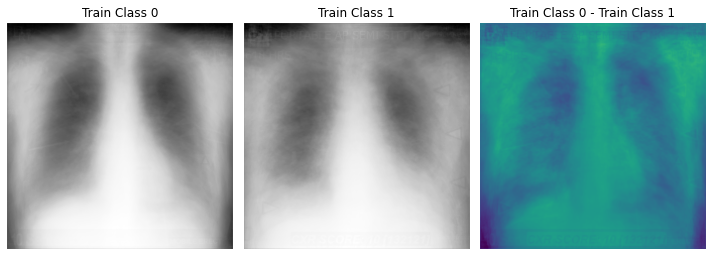

In [10]:
fig, ((ax1, ax2, ax3)) = plt.subplots(figsize=(10,10), nrows=1, ncols=3)
 
#, (ax4, ax5, ax6)
ax1.imshow(train_0, cmap="Greys_r")
ax1.set_title('Train Class 0')
ax1.axis('off')
ax2.imshow(train_1, cmap="Greys_r")
ax2.set_title('Train Class 1')
ax2.axis('off')

dif = train_0-train_1
lim = np.max(np.abs(dif))
ax3.imshow(dif, vmin=-lim,vmax=lim)
ax3.set_title('Train Class 0 - Train Class 1');
ax3.axis('off')

plt.tight_layout()

In [11]:
train_0, train_1 = get_label_images(covariate_train05, 60)

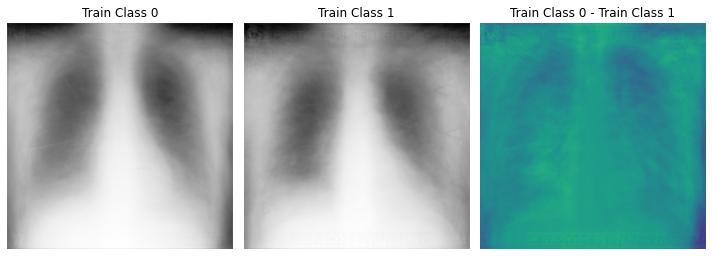

In [12]:
fig, ((ax1, ax2, ax3)) = plt.subplots(figsize=(10,10), nrows=1, ncols=3)
 
#, (ax4, ax5, ax6)
ax1.imshow(train_0, cmap="Greys_r")
ax1.set_title('Train Class 0')
ax1.axis('off')
ax2.imshow(train_1, cmap="Greys_r")
ax2.set_title('Train Class 1')
ax2.axis('off')

dif = train_0-train_1
#lim = np.max(np.abs(dif)) # use existing limit
ax3.imshow(dif, vmin=-lim,vmax=lim)
ax3.set_title('Train Class 0 - Train Class 1');
ax3.axis('off')

plt.tight_layout()